Welcome to JupyROOT 6.28/04
Fit 1:  1118.9545303373689 12


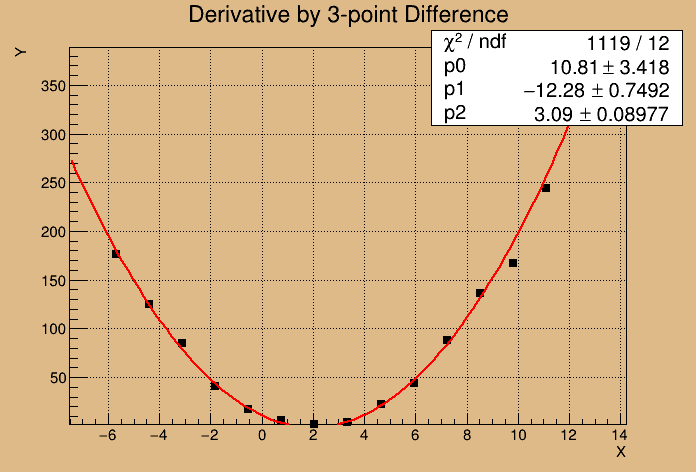

In [1]:
from ROOT import TCanvas, TGraph, TFile, TF1
from ROOT import gROOT, gStyle
from array import array
import numpy as np

gROOT.Reset()

c1 = TCanvas( 'c1', 'Cubic Data',200,10,700,500)
c1.SetFillColor(42)
c1.SetGrid()

gStyle.SetOptFit(1)

filename = "deriv.dat"
x1, y1 = np.loadtxt(filename, unpack=True)
x = array("d",x1)
y = array("d",y1)

gr = TGraph( len(x), x, y )
gr.SetMarkerStyle(21)
gr.SetTitle('Derivative by 3-point Difference')
gr.GetXaxis().SetTitle('X')
gr.GetYaxis().SetTitle('Y')

pfit1 = TF1("pfit1","pol2")
pfit1.SetLineColor(2)
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: ",pfit1chi2,pfit1ndf)

gr.Draw("AP")
c1.Draw()

# draw the legend
#   Char_t message[80];
#   TLegend *legend=new TLegend(0.4,0.15,0.88,0.35);
#   legend->SetTextFont(72);
#   legend->SetTextSize(0.04);
#   legend->AddEntry(gr,"Data","lpe");
#   sprintf(message,"Cubic Fit: #chi^{2}/NDF = %.5f",pfit1chi2ndf);
#   legend->AddEntry(pfit1,message);
# legend->Draw();

# TCanvas::Update() draws the frame, after which one can change it
#c1.Update()
#c1.GetFrame().SetFillColor(21)
#c1.GetFrame().SetBorderSize(12)
#c1.Modified()
#c1.Update()